In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  

**Loading the data**

In [2]:
df = pd.read_csv('temp/Final_Dataset.csv')
df = df.sample(frac = 1)
df

,Unnamed: 0,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,all_malicious,out_and_tx_malicious
976874,976874,69e8c8a5adac65dd7e551e34dee9299f0d7ee8dc341e7f...,1.0,2.0,90.275000,90.275000,180.550000,90.275000,45.137500,0.0,0.0,0.0,0.0,0.0
947696,947696,4f0b7a4ac9cb8fcb41395e03b14cb3a42fe1acdcfc8d5f...,1.0,2.0,19.576000,19.576000,39.152000,19.576000,9.788000,0.0,0.0,0.0,0.0,0.0
827018,827018,d2beda3f265a4314630c1d39637485fc6fa0e4958c75d7...,1.0,1.0,21.248041,21.178041,42.426082,21.248041,21.178041,0.0,0.0,0.0,0.0,0.0
354540,354540,94ace5862ecb5208a4a3dfb7e86ccdec84be49e0d13276...,1.0,1.0,3.000000,2.600000,5.600000,3.000000,2.600000,0.0,0.0,0.0,0.0,0.0
279133,279133,464ae0a4687fbd406aea276ae5ebcbe4c3a3024c4a0655...,1.0,1.0,0.010000,0.010000,0.020000,0.010000,0.010000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514512,514512,1f3066867ecd1be81118e1df0c5b330975ab45480a1c3b...,1.0,2.0,54.160000,54.160000,108.320000,54.160000,27.080000,0.0,0.0,0.0,0.0,0.0
111219,111219,e420ee65809a50f614e3b1244a9a2ba7fa3a7e1ea55c99...,1.0,1.0,50.000000,50.000000,100.000000,50.000000,50.000000,0.0,0.0,0.0,0.0,0.0
392669,392669,ca48a5830a0446c71ee25ffc3a5e1a2da6363ad4f3a84a...,0.0,1.0,0.000000,50.000000,50.000000,0.000000,50.000000,0.0,0.0,0.0,0.0,0.0
53349,53349,32bb3e6aac398c4a0bdfbcad78cb43c7309f1b657cbaf6...,1.0,2.0,6.580000,6.580000,13.160000,6.580000,3.290000,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(1000105, 14)

In [4]:
df.describe()

,Unnamed: 0,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,all_malicious,out_and_tx_malicious
count,1.000105e+06,1.000105e+06,1.000105e+06,1.000105e+06,1.000105e+06,1.000105e+06,1.000105e+06,1.000105e+06,1.000105e+06,1.000105e+06,1.000105e+06,1.000105e+06,1.000105e+06
mean,4.999440e+05,1.581877e+00,1.823178e+00,1.475096e+02,1.508677e+02,2.983773e+02,1.330834e+02,9.000626e+01,5.099465e-04,6.499318e-05,4.699507e-05,6.139355e-04,1.079887e-04
std,2.887056e+05,5.261233e+00,5.102122e+00,2.323695e+03,2.320377e+03,4.615422e+03,2.107230e+03,1.384711e+03,2.257625e-02,8.061577e-03,6.855137e-03,2.477013e-02,1.039120e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.993300e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.499180e+05,1.000000e+00,1.000000e+00,3.000000e-01,1.200000e+00,2.660000e+00,2.000000e-01,9.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.999440e+05,1.000000e+00,2.000000e+00,9.899800e+00,2.082000e+01,4.302000e+01,7.200000e+00,1.143653e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.499700e+05,1.000000e+00,2.000000e+00,4.857000e+01,5.000000e+01,9.688000e+01,4.617000e+01,5.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.999960e+05,9.650000e+02,9.220000e+02,4.420000e+05,4.420000e+05,8.840000e+05,4.321099e+05,4.000000e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
df['out_and_tx_malicious'].min()


0.0

**Drop unnecessary columns**

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('tx_hash', axis=1, inplace=True)
df.drop('in_malicious', axis=1, inplace=True)
df.drop('out_malicious', axis=1, inplace=True)
df.drop('is_malicious', axis=1, inplace=True)
df.drop('all_malicious', axis=1, inplace=True)

In [7]:
print('No Frauds', round(df['out_and_tx_malicious'].value_counts()[0]/len(df) * 100,7), '% of the dataset')
print('Frauds', round(df['out_and_tx_malicious'].value_counts()[1]/len(df) * 100,5), '% of the dataset')

No Frauds 99.9892011 % of the dataset
Frauds 0.0108 % of the dataset


In [8]:
df['out_and_tx_malicious'].value_counts()

0.0    999997
1.0       108
Name: out_and_tx_malicious, dtype: int64

**Scaled Transform**

In [9]:
import sklearn as sk
# Log scale to normalize the data
scaled_df = df.copy()

scaled_df['indegree'] = np.log1p(scaled_df['indegree'])
scaled_df['outdegree']= np.log1p(scaled_df['outdegree'])
scaled_df['in_btc'] = np.log1p(scaled_df['in_btc'])
scaled_df['out_btc']= np.log1p(scaled_df['out_btc'])
scaled_df['total_btc']= np.log1p(scaled_df['total_btc'])
scaled_df['mean_in_btc']= np.log1p(scaled_df['mean_in_btc'])
scaled_df['mean_out_btc']= np.log1p(scaled_df['mean_out_btc'])

# RobustScaler is less prone to outliers.
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

scaled_df['indegree'] = rob_scaler.fit_transform(scaled_df['indegree'].values.reshape(-1,1))
scaled_df['outdegree'] = rob_scaler.fit_transform(scaled_df['outdegree'].values.reshape(-1,1))
scaled_df['in_btc'] = rob_scaler.fit_transform(scaled_df['in_btc'].values.reshape(-1,1))
scaled_df['out_btc'] = rob_scaler.fit_transform(scaled_df['out_btc'].values.reshape(-1,1))
scaled_df['total_btc'] = rob_scaler.fit_transform(scaled_df['total_btc'].values.reshape(-1,1))
scaled_df['mean_in_btc'] = rob_scaler.fit_transform(scaled_df['mean_in_btc'].values.reshape(-1,1))
scaled_df['mean_out_btc'] = rob_scaler.fit_transform(scaled_df['mean_out_btc'].values.reshape(-1,1))


In [10]:
scaled_df

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
976874,0.000000,0.0,0.583664,0.455260,0.431152,0.656349,0.399752,0.0
947696,0.000000,0.0,0.174506,-0.018675,-0.027987,0.250581,-0.043361,0.0
827018,0.000000,-1.0,0.195964,0.005178,-0.004134,0.271861,0.176388,0.0
354540,0.000000,-1.0,-0.275321,-0.573236,-0.577423,-0.195520,-0.378016,0.0
279133,0.000000,-1.0,-0.653332,-0.977574,-1.145624,-0.570399,-0.765570,0.0
...,...,...,...,...,...,...,...,...
514512,0.000000,0.0,0.445340,0.295037,0.276798,0.519171,0.248336,0.0
111219,0.000000,-1.0,0.423804,0.270092,0.252710,0.497814,0.430306,0.0
392669,-0.693147,-1.0,-0.656064,0.270092,0.044787,-0.573109,0.430306,0.0
53349,0.000000,0.0,-0.099761,-0.336363,-0.345139,-0.021414,-0.324547,0.0


In [11]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from pylab import rcParams
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D

**Split training and testing data**

In [12]:
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(scaled_df.iloc[:,:-1], scaled_df['out_and_tx_malicious'], test_size = 0.2, random_state=2)

In [13]:
original_ytest

673864    0.0
996443    0.0
108781    0.0
590694    0.0
345330    0.0
         ... 
654862    0.0
892369    0.0
92480     0.0
359087    0.0
238488    0.0
Name: out_and_tx_malicious, Length: 200021, dtype: float64

In [14]:
original_Xtrain

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
285659,0.0,-1.0,-0.199070,-0.455031,-0.466592,-0.119901,-0.264717
582570,0.0,-1.0,-0.467069,-0.763426,-0.820406,-0.385680,-0.560311
430309,0.0,0.0,0.244205,0.062058,0.050930,0.319702,0.030836
84187,0.0,0.0,0.619694,0.496995,0.471278,0.692080,0.439348
931610,0.0,0.0,-0.146235,-0.390196,-0.400619,-0.067504,-0.369662
...,...,...,...,...,...,...,...
955647,0.0,-1.0,0.268757,0.090498,0.078632,0.344051,0.258167
969421,0.0,0.0,0.398493,0.240774,0.224376,0.472712,0.197333
811640,0.0,0.0,0.373801,0.212172,0.196707,0.448225,0.170522
310149,0.0,0.0,-0.124384,-0.364885,-0.374442,-0.045833,-0.348569


**Oversampling trainig data**

In [15]:
from imblearn.over_sampling import SMOTE

SM = SMOTE(random_state=42)
original_Xtrain, original_ytrain  = SM.fit_resample(original_Xtrain, original_ytrain)

In [16]:
# models = {}
# sse = {}

# for k in range(2, 30):
#     kmeans = MiniBatchKMeans(init='k-means++', n_clusters=k, n_init=1000, max_iter=15000, batch_size=256)
#     kmeans.fit(original_Xtrain)    
#     models[k] = kmeans    
#     labels = kmeans.labels_
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
#     print("\nDone with k = "+str(k))

In [17]:
# plt.style.use('seaborn')

# #Sum of distances of samples to their closest cluster center
# plt.figure(figsize=(10,7))
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xticks(list(sse.keys()))
# plt.xlabel("Number of cluster")
# plt.ylabel("Sum of squared distances")

# plt.show()

**Train Model**

In [18]:
models = {}
sse = {}


for k in range(2, 13):
    kmeans = MiniBatchKMeans(init='k-means++', n_clusters=k, n_init=1000, max_iter=15000, batch_size=256)
    kmeans.fit(original_Xtrain)    
    models[k] = kmeans    
    labels = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print("\nDone with k = "+str(k))


Done with k = 2

Done with k = 3

Done with k = 4

Done with k = 5

Done with k = 6

Done with k = 7

Done with k = 8

Done with k = 9

Done with k = 10

Done with k = 11

Done with k = 12


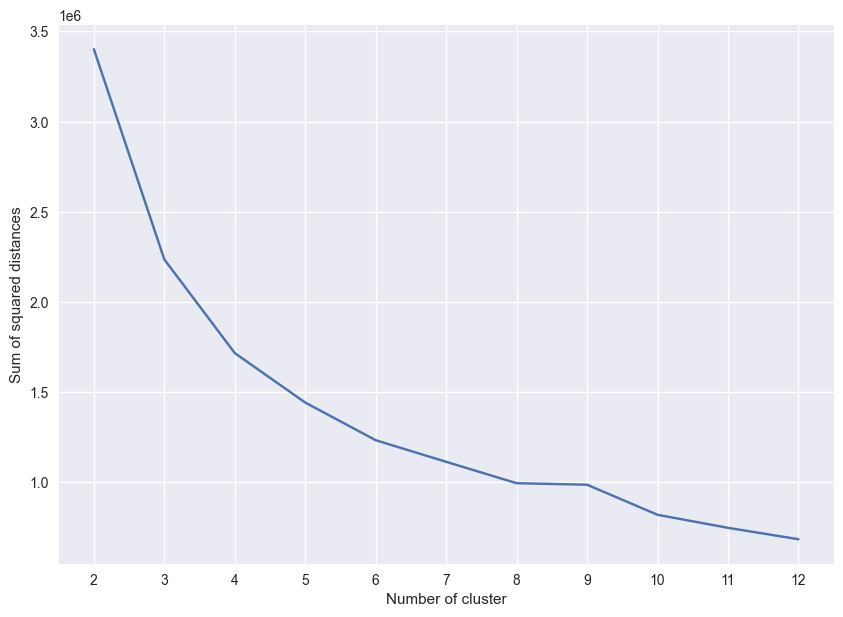

In [19]:
plt.style.use('seaborn')

#Sum of distances of samples to their closest cluster center
plt.figure(figsize=(10,7))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xticks(list(sse.keys()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared distances")

plt.show()

**Save Model**

In [20]:
for k in models:
    pickle.dump(models.get(k), open('./Models/Kmeans/k='+str(k)+'.h5', 'wb'))

**Train data evaluation**

In [21]:
train_predictions = {}
normal_count = pd.value_counts(original_ytrain)[0]
fraud_count = pd.value_counts(original_ytrain)[1]
for k in models:
    print('Model with K='+str(k)+'\n'+'=================================\n')
    train_predictions[k] = models.get(k).predict(original_Xtrain)

    print("Predicted for K="+str(k))
    loc = 0
    countdict = {}
    m_locs = set(np.where(original_ytrain == 1)[0])
    for pred in train_predictions[k]:
        countdict[pred] = countdict.get(pred, 0) + 0
        if loc in m_locs:
            countdict[pred] = countdict.get(pred, 0) + 1
        loc = loc + 1
    for key, value in sorted(countdict.items()):
        non_mal = len((np.where(train_predictions[k] == key)[0]))-value
        print('Cluster '+str(key+1)+': \t Malicious: '+str(value)+ ' ('+str(round((value*100)/fraud_count,3))+'%)' +' \t Non-Malicious: '+str(non_mal)+' ('+str(round((non_mal*100)/normal_count,3))+'%)\n')
    print('\n')

Model with K=2

Predicted for K=2
Cluster 1: 	 Malicious: 407763 (50.971%) 	 Non-Malicious: 69024 (8.628%)

Cluster 2: 	 Malicious: 392231 (49.029%) 	 Non-Malicious: 730970 (91.372%)



Model with K=3

Predicted for K=3
Cluster 1: 	 Malicious: 322715 (40.34%) 	 Non-Malicious: 462601 (57.826%)

Cluster 2: 	 Malicious: 353261 (44.158%) 	 Non-Malicious: 19514 (2.439%)

Cluster 3: 	 Malicious: 124018 (15.502%) 	 Non-Malicious: 317879 (39.735%)



Model with K=4

Predicted for K=4
Cluster 1: 	 Malicious: 288058 (36.008%) 	 Non-Malicious: 25411 (3.176%)

Cluster 2: 	 Malicious: 284401 (35.55%) 	 Non-Malicious: 363033 (45.379%)

Cluster 3: 	 Malicious: 126571 (15.821%) 	 Non-Malicious: 407642 (50.956%)

Cluster 4: 	 Malicious: 100964 (12.621%) 	 Non-Malicious: 3908 (0.489%)



Model with K=5

Predicted for K=5
Cluster 1: 	 Malicious: 124355 (15.544%) 	 Non-Malicious: 315289 (39.411%)

Cluster 2: 	 Malicious: 100935 (12.617%) 	 Non-Malicious: 3826 (0.478%)

Cluster 3: 	 Malicious: 285819 (35.7

**Test data evaluation**

In [22]:
predictions = {}
normal_count = pd.value_counts(original_ytest)[0]
fraud_count = pd.value_counts(original_ytest)[1]
for k in models:
    print('Model with K='+str(k)+'\n'+'=================================\n')
    predictions[k] = models.get(k).predict(original_Xtest)
    print("Predicted for K="+str(k)+"value = "+str(predictions[k]))
    loc = 0
    countdict = {}
    m_locs = set(np.where(original_ytest == 1)[0])
    for pred in predictions[k]:
        countdict[pred] = countdict.get(pred, 0) + 0
        if loc in m_locs:
            countdict[pred] = countdict.get(pred, 0) + 1
        loc = loc + 1
    for key, value in sorted(countdict.items()):
        non_mal = len((np.where(predictions[k] == key)[0]))-value
        print('Cluster '+str(key+1)+': \t Malicious: '+str(value)+ ' ('+str(round((value*100)/fraud_count,3))+'%)' +' \t Non-Malicious: '+str(non_mal)+' ('+str(round((non_mal*100)/normal_count,3))+'%)\n')
    print('\n')


Model with K=2

Predicted for K=2value = [1 1 1 ... 1 1 1]
Cluster 1: 	 Malicious: 9 (50.0%) 	 Non-Malicious: 17429 (8.714%)

Cluster 2: 	 Malicious: 9 (50.0%) 	 Non-Malicious: 182574 (91.286%)



Model with K=3

Predicted for K=3value = [2 2 2 ... 0 2 0]
Cluster 1: 	 Malicious: 8 (44.444%) 	 Non-Malicious: 115521 (57.76%)

Cluster 2: 	 Malicious: 7 (38.889%) 	 Non-Malicious: 4905 (2.452%)

Cluster 3: 	 Malicious: 3 (16.667%) 	 Non-Malicious: 79577 (39.788%)



Model with K=4

Predicted for K=4value = [2 2 2 ... 1 2 2]
Cluster 1: 	 Malicious: 4 (22.222%) 	 Non-Malicious: 6500 (3.25%)

Cluster 2: 	 Malicious: 7 (38.889%) 	 Non-Malicious: 90555 (45.277%)

Cluster 3: 	 Malicious: 3 (16.667%) 	 Non-Malicious: 102027 (51.013%)

Cluster 4: 	 Malicious: 4 (22.222%) 	 Non-Malicious: 921 (0.46%)



Model with K=5

Predicted for K=5value = [0 0 0 ... 2 4 4]
Cluster 1: 	 Malicious: 3 (16.667%) 	 Non-Malicious: 78934 (39.466%)

Cluster 2: 	 Malicious: 4 (22.222%) 	 Non-Malicious: 894 (0.447%)

Clu

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

def evaluation_summary(test_y, predictions, clf_name):
    print('For ' + clf_name)
    print('Balanced Accuracy: '+ str(round(balanced_accuracy_score(test_y, predictions),7)))
    print('Macro Precision: '+ str(round(precision_score(test_y, predictions, average="macro"),7)))
    print('Macro Recall: '+ str(round(recall_score(test_y,predictions, average="macro"),7)))
    print('Macro F1: '+ str(round(f1_score(test_y,predictions, average="macro"),7)))
    print('\n')
    
    print('Normal Accuracy: '+ str(round(accuracy_score(test_y, predictions),7)))
    print('Normal Precision: '+ str(round(precision_score(test_y, predictions),7)))
    print('Normal Recall: '+ str(round(recall_score(test_y,predictions),7)))
    print('Normal F1: '+ str(round(f1_score(test_y,predictions),7)))
    print('\n')
    print(classification_report(test_y, predictions, labels=[0, 1]))
    print('\n')


In [24]:
def conf_matrix_percent(conf_matrix_train, conf_matrix_test):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    LABELS = ["Normal", "Fraud"]
    #Confusion Matrix Visual
    conf_matrix_train = conf_matrix_train.astype('float') / (conf_matrix_train.sum(axis=1)[:, np.newaxis])
    sns.heatmap(conf_matrix_train, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt=".0%", annot_kws={"size": 12}, ax=ax1)
    ax1.set_title("Training Confusion matrix")
    ax1.set_ylabel('True class')
    ax1.set_xlabel('Predicted class')
    
    conf_matrix_test = conf_matrix_test.astype('float') / (conf_matrix_test.sum(axis=1)[:, np.newaxis])
    sns.heatmap(conf_matrix_test, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt=".0%", annot_kws={"size": 12}, ax=ax2)
    ax2.set_title("Test Confusion matrix")
    ax2.set_ylabel('True class')
    ax2.set_xlabel('Predicted class')


In [25]:
def conf_matrix_normal(conf_matrix_train, conf_matrix_test):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    LABELS = ["Normal", "Fraud"]
#     conf_matrix_train = conf_matrix_train.astype('float') / (conf_matrix_train.sum(axis=1)[:, np.newaxis])
    sns.heatmap(conf_matrix_train, xticklabels=LABELS, yticklabels=LABELS, annot=True, annot_kws={"size": 12}, fmt="d", ax=ax1);
    ax1.set_title("Training Confusion matrix")
    ax1.set_ylabel('True class')
    ax1.set_xlabel('Predicted class')
    
#     conf_matrix_test = conf_matrix_test.astype('float') / (conf_matrix_test.sum(axis=1)[:, np.newaxis])
    sns.heatmap(conf_matrix_test, xticklabels=LABELS, yticklabels=LABELS, annot=True, annot_kws={"size": 12}, fmt="d", ax=ax2);
    ax2.set_title("Test Confusion matrix")
    ax2.set_ylabel('True class')
    ax2.set_xlabel('Predicted class')

In [26]:
k = 4
print('For K='+str(k))
merge = [4,2]

prediction = predictions[k].copy()
t_prediction = train_predictions[k].copy()


if len(pd.value_counts(t_prediction)) > 2 and len(pd.value_counts(prediction)) > 2:
    for i in range(0,k):
        if (i+1) in merge:
            prediction[prediction == i] = -1
            t_prediction[t_prediction == i] = -1
        else:
            prediction[prediction == i] = 0
            t_prediction[t_prediction == i] = 0

    prediction[prediction == -1] = 1
    t_prediction[t_prediction == -1] = 1

    print('Train Cluster Merge Result:\n')
    print(pd.value_counts(t_prediction))

    print('\n\nTest Cluster Merge Result:\n')
    print(pd.value_counts(prediction))


For K=4
Train Cluster Merge Result:

0    847682
1    752306
dtype: int64


Test Cluster Merge Result:

0    108534
1     91487
dtype: int64


In [27]:
report = metrics.classification_report(original_ytrain, t_prediction) 
print(report)

              precision    recall  f1-score   support

         0.0       0.51      0.54      0.53    799994
         1.0       0.51      0.48      0.50    799994

    accuracy                           0.51   1599988
   macro avg       0.51      0.51      0.51   1599988
weighted avg       0.51      0.51      0.51   1599988



In [28]:
evaluation_summary(original_ytrain, t_prediction, 'K-means (K='+str(k)+')')

For K-means (K=4)
Balanced Accuracy: 0.5115151
Macro Precision: 0.5115562
Macro Recall: 0.5115151
Macro F1: 0.5110808


Normal Accuracy: 0.5115151
Normal Precision: 0.512245
Normal Recall: 0.4817099
Normal F1: 0.4965084


              precision    recall  f1-score   support

           0       0.51      0.54      0.53    799994
           1       0.51      0.48      0.50    799994

    accuracy                           0.51   1599988
   macro avg       0.51      0.51      0.51   1599988
weighted avg       0.51      0.51      0.51   1599988





In [29]:
evaluation_summary(original_ytest, prediction, 'K-means (K='+str(k)+')')

For K-means (K=4)
Balanced Accuracy: 0.576869
Macro Precision: 0.5000279
Macro Recall: 0.576869
Macro F1: 0.3518673


Normal Accuracy: 0.542633
Normal Precision: 0.0001202
Normal Recall: 0.6111111
Normal F1: 0.0002404


              precision    recall  f1-score   support

           0       1.00      0.54      0.70    200003
           1       0.00      0.61      0.00        18

    accuracy                           0.54    200021
   macro avg       0.50      0.58      0.35    200021
weighted avg       1.00      0.54      0.70    200021





In [30]:
cnf_mtx_test = confusion_matrix(original_ytest, prediction)
cnf_mtx_train = confusion_matrix(original_ytrain, t_prediction)

In [31]:
cnf_mtx_train

array([[433053, 366941],
       [414629, 385365]], dtype=int64)

In [32]:
cnf_mtx_test

array([[108527,  91476],
       [     7,     11]], dtype=int64)

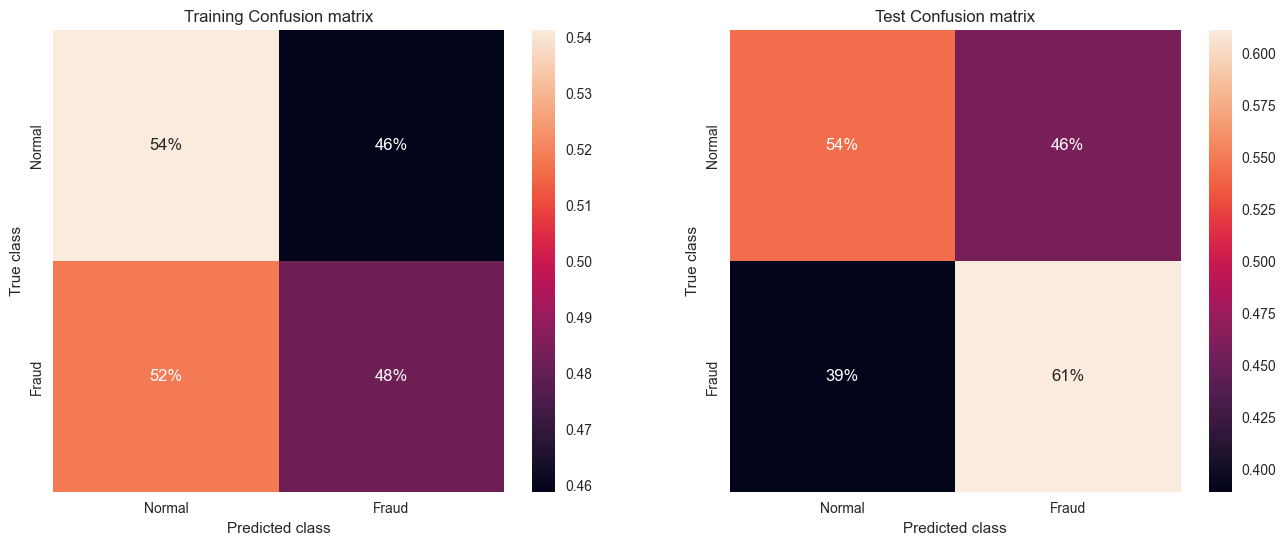

In [33]:
conf_matrix_percent(cnf_mtx_train, cnf_mtx_test)


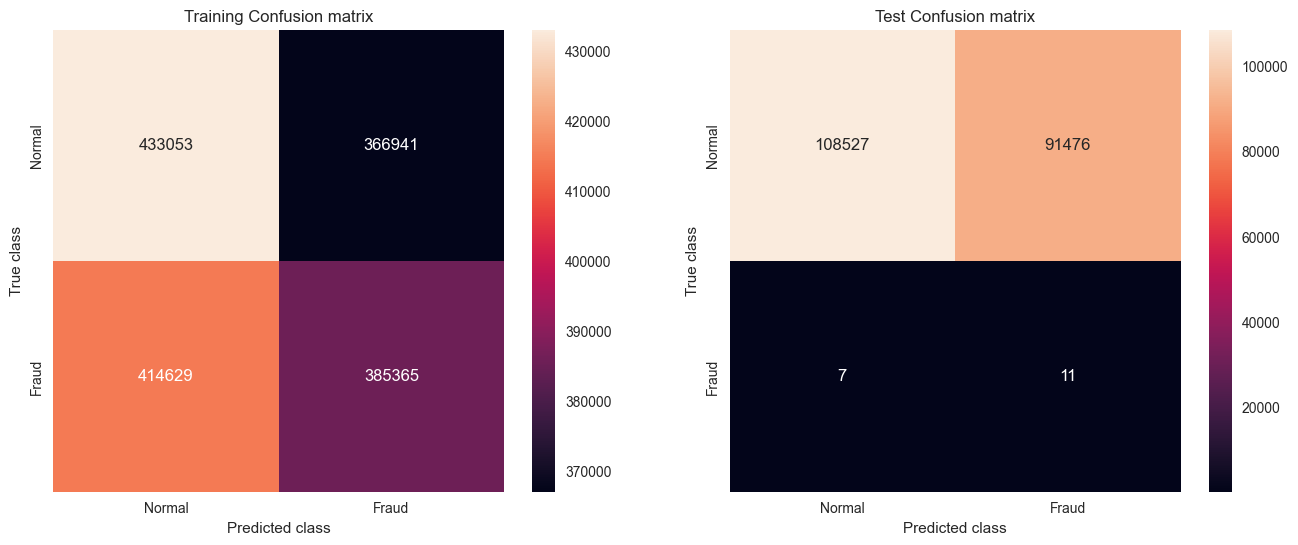

In [34]:
conf_matrix_normal(cnf_mtx_train, cnf_mtx_test)


In [35]:
def get_tx_is_malicious(indegree, outdegree, in_btc, out_btc, total_btc, mean_in_btc, mean_out_btc, model):
    """Get the value of d for a given set of values for a, b, and c."""
    X = [[indegree, outdegree, in_btc, out_btc, total_btc, mean_in_btc, mean_out_btc]]
    prediction = model.predict(X)
    print(prediction)
    cluster_index = prediction[0]
    cluster_centers = model.cluster_centers_
    is_malicious = cluster_centers[cluster_index][3]

    return is_malicious

In [36]:
for k in range(2,13):
    a = get_tx_is_malicious(11, 2, 1.11, 1.11, 2.22, 0.1, 0.55, models[k])
    print(a)


[0]
1.387746818912053
[1]
1.5233846126556438
[3]
1.2838458951270373
[1]
1.2936561049323327
[4]
1.2349390614413152
[3]
1.260012050939791
[0]
1.2435026266688192
[3]
1.3005282329251406
[4]
1.2334031337155287
[4]
1.2354141686044355
[5]
1.32702611989082


C:\Users\MSI\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\MSI\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\MSI\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\MSI\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\MSI\AppData\Local\Programs\Python\Python37\lib\

In [37]:
type(models[2])

sklearn.cluster._kmeans.MiniBatchKMeans

In [38]:
models


{2: MiniBatchKMeans(batch_size=256, max_iter=15000, n_clusters=2, n_init=1000),
 3: MiniBatchKMeans(batch_size=256, max_iter=15000, n_clusters=3, n_init=1000),
 4: MiniBatchKMeans(batch_size=256, max_iter=15000, n_clusters=4, n_init=1000),
 5: MiniBatchKMeans(batch_size=256, max_iter=15000, n_clusters=5, n_init=1000),
 6: MiniBatchKMeans(batch_size=256, max_iter=15000, n_clusters=6, n_init=1000),
 7: MiniBatchKMeans(batch_size=256, max_iter=15000, n_clusters=7, n_init=1000),
 8: MiniBatchKMeans(batch_size=256, max_iter=15000, n_init=1000),
 9: MiniBatchKMeans(batch_size=256, max_iter=15000, n_clusters=9, n_init=1000),
 10: MiniBatchKMeans(batch_size=256, max_iter=15000, n_clusters=10, n_init=1000),
 11: MiniBatchKMeans(batch_size=256, max_iter=15000, n_clusters=11, n_init=1000),
 12: MiniBatchKMeans(batch_size=256, max_iter=15000, n_clusters=12, n_init=1000)}

In [40]:
np.where(True)[0]

array([0], dtype=int64)